In [23]:
import pandas as pd
import numpy as np
import math as mt
from numpy import dot
from numpy.linalg import norm
from scipy import stats
from sklearn.decomposition import TruncatedSVD 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import IPython.display

sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

def euclidean_distance(A, B):
    err = 0
    length = len(A)
    for idx in range(0, length):
        tmp = ((A[idx] - B[idx]) ** 2)
        err += tmp
        
    return mt.sqrt(err)

def cosine_similarity(A,B):
    return dot(A, B) / (norm(A) * norm(B))

def sumDiffer(A,B):
    length = len(A)
    err = 0
    for idx in range(0, length):
        err += ((A[idx] - B[idx]) ** 2)
    return mt.sqrt(err / length)

def improved_similarity(A, B, w):
    cos_sim = cosine_similarity(A, B)
    sum_diff = sumDiffer(A, B)
    w **= sum_diff
    
    return cos_sim * w

## Compare Improved Cosine Similarity, Pearson Correlation Coefficient Matrix Factorization based
- 행렬분해의 기법 중, 차원축소를 통해서 원본 행렬보다 적은 정보량을 가지고 있는 행렬을 만들어 냈을 때, 성능 상 잘 동작하는 유사도 알고리즘을 확인해보기 위한 테스트
- keyword : TruncatedSVD, Pearson Correlation Coefficient, Improved Cosine Similarity
- 상관계수 로직으로 뽑아낸 각 벡터들의 모든 벡터들과의 상관계수 데이터들의 특정 표준편차 n% 설정
- 향상된 코사인 유사도 로직으로 뽑아낸 각 벡터들의 모든 벡터들과의 상관계수 데이터들의 특정 표준편차 n% 설정

<AxesSubplot:>

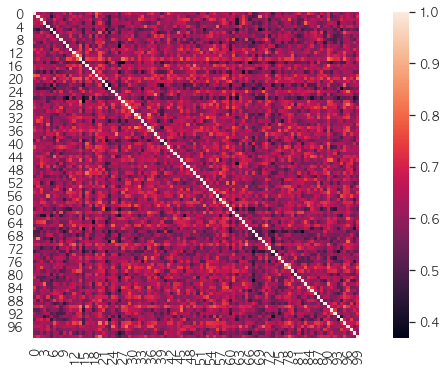

In [137]:
datas = np.round((np.random.rand(100,64) * 500))
SVD = TruncatedSVD(n_components=32)
factor_datas = SVD.fit_transform(datas)
# factor_datas = datas

corr_map = np.array([])
for A in factor_datas:
    _ = np.array([])
    for B in factor_datas:
        corr = (stats.pearsonr(A,B)[0] ** 2)
        _ = np.append(_, corr)
    corr_map = np.append(corr_map,[_])
corr_map = corr_map.reshape(100,100)

sns.heatmap(corr_map, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            square=True, #차트를 정사각형으로 할 것인지
           )

<AxesSubplot:>

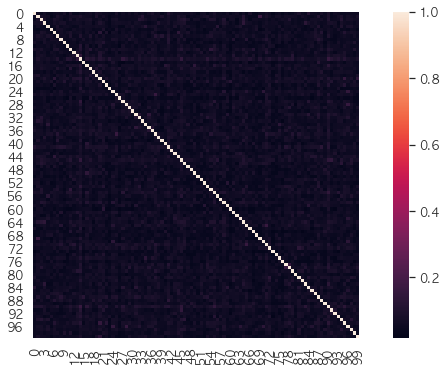

In [138]:
imp_map = np.array([])
for A in factor_datas:
    _ = np.array([])
    for B in factor_datas:
        imp = improved_similarity(A,B,0.99)
        _ = np.append(_, imp)
    imp_map = np.append(imp_map,[_])
imp_map = imp_map.reshape(100,100)

sns.heatmap(imp_map, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            square=True, #차트를 정사각형으로 할 것인지
           )

In [139]:
# 피어슨 상관계수 유사도의 추천서비스로 인해 나온 값
cols = ['유클리디안 거리', '코사인 유사도', '향상된 코사인 유사도']
corr_rec_idx = corr_map.sum(axis=0).argmax()

A = datas[corr_rec_idx]
B_values = np.delete(datas,corr_rec_idx, axis=0)

corr_anal_df = pd.DataFrame(columns=cols)
for idx,B in enumerate(B_values):
    corr_anal_df.loc[idx] = [
        euclidean_distance(A,B),
        cosine_similarity(A,B),
        improved_similarity(A, B, 0.99)
    ]

print("평균 유클리디안 거리 : {}".format(corr_anal_df[cols[0]].mean()))
print("평균 코사인 유사도 : {}".format(corr_anal_df[cols[1]].mean()))
print("평균 향상된 코사인 유사도 : {}\n".format(corr_anal_df[cols[2]].mean()))
corr_anal_df

평균 유클리디안 거리 : 1537.773238798325
평균 코사인 유사도 : 0.7738890956600954
평균 향상된 코사인 유사도 : 0.11341238322510656



,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
0,1458.016804,0.809628,0.129655
1,1484.273897,0.779962,0.120852
2,1440.229148,0.786310,0.128767
3,1537.293726,0.761001,0.110316
4,1703.953931,0.717883,0.084406
...,...,...,...
94,1392.431686,0.837794,0.145689
95,1549.327919,0.768550,0.109738
96,1615.599889,0.749313,0.098444
97,1495.211022,0.775695,0.118550


In [140]:
# 향상된 코사인 유사도의 추천 서비스로 인해 나온 값
imp_rec_idx = imp_map.sum(axis=0).argmax()

A = datas[imp_rec_idx]
B_values = np.delete(datas,imp_rec_idx, axis=0)

imp_anal_df = pd.DataFrame(columns=cols)
for idx,B in enumerate(B_values):
    imp_anal_df.loc[idx] = [
        euclidean_distance(A,B),
        cosine_similarity(A,B),
        improved_similarity(A, B, 0.99)
    ]

print("평균 유클리디안 거리 : {}".format(imp_anal_df[cols[0]].mean()))
print("평균 코사인 유사도 : {}".format(imp_anal_df[cols[1]].mean()))
print("평균 향상된 코사인 유사도 : {}\n".format(imp_anal_df[cols[2]].mean()))
imp_anal_df

평균 유클리디안 거리 : 1525.9352633581136
평균 코사인 유사도 : 0.7706307175599191
평균 향상된 코사인 유사도 : 0.11470700068581503



,유클리디안 거리,코사인 유사도,향상된 코사인 유사도
0,1696.916910,0.734945,0.087180
1,1469.437648,0.776262,0.122541
2,1570.240746,0.734652,0.102178
3,1628.297884,0.721261,0.093259
4,1587.090105,0.747159,0.101741
...,...,...,...
94,1433.981869,0.825799,0.136299
95,1464.167682,0.786846,0.125037
96,1639.267214,0.733727,0.093573
97,1566.112384,0.744499,0.104086


In [178]:
def test_func(n_components=32):
    datas = np.round((np.random.rand(100,64) * 500))
    SVD = TruncatedSVD(n_components=n_components)
    factor_datas = None
    
    if n_components == 64:
        factor_datas = datas
    else:
        factor_datas = SVD.fit_transform(datas)
        
    corr_map = np.array([])
    for A in factor_datas:
        _ = np.array([])
        for B in factor_datas:
            corr = (stats.pearsonr(A,B)[0] ** 2)
            _ = np.append(_, corr)
        corr_map = np.append(corr_map,[_])
    corr_map = corr_map.reshape(100,100)
    
    imp_map = np.array([])
    for A in factor_datas:
        _ = np.array([])
        for B in factor_datas:
            imp = improved_similarity(A,B,0.99)
            _ = np.append(_, imp)
        imp_map = np.append(imp_map,[_])
    imp_map = imp_map.reshape(100,100)
    
    # 피어슨 상관계수 유사도의 추천서비스로 인해 나온 값
    cols = ['향상된 코사인 유사도']
    corr_rec_idx = corr_map.sum(axis=0).argmax()

    A = datas[corr_rec_idx]
    B_values = np.delete(datas,corr_rec_idx, axis=0)

    corr_anal_df = pd.DataFrame(columns=cols)
    for idx,B in enumerate(B_values):
        corr_anal_df.loc[idx] = [
            improved_similarity(A, B, 0.99)
        ]
        
    # 향상된 코사인 유사도의 추천 서비스로 인해 나온 값
    imp_rec_idx = imp_map.sum(axis=0).argmax()

    A = datas[imp_rec_idx]
    B_values = np.delete(datas,imp_rec_idx, axis=0)

    imp_anal_df = pd.DataFrame(columns=cols)
    for idx,B in enumerate(B_values):
        imp_anal_df.loc[idx] = [
            improved_similarity(A, B, 0.99)
        ]
        
    return (
        corr_anal_df[cols[0]].mean(),
        imp_anal_df[cols[0]].mean()
    )

In [188]:
test_cols = ['상관계수 기반 추천 imp', 'imp 기반 추천 imp']
test_df = pd.DataFrame(columns=test_cols)
n_components = 64

for test_idx in range(100):
    print("test {}".format(test_idx))
    
    corr, imp = test_func(n_components)
    test_df.loc["test {}".format(test_idx)] = [
        corr,
        imp
    ]
    IPython.display.clear_output()

corr_cnt = 0
corr_imp_sum = 0
imp_cnt = 0
imp_sum = 0

for idx in test_df.index:
    corr_imp_sum += test_df.loc[idx][test_cols[0]]
    imp_sum += test_df.loc[idx][test_cols[1]]
    if test_df.loc[idx][test_cols[0]] > \
        test_df.loc[idx][test_cols[1]]:
        corr_cnt += 1
    elif test_df.loc[idx][test_cols[0]] < \
        test_df.loc[idx][test_cols[1]]:
        imp_cnt += 1
        
print("상관계수 추천 데이터 우세 Count: {}".format(corr_cnt))
print("상관계수 추천 데이터 평균 imp: {}".format(corr_imp_sum / 100))
print("향상된 코사인 유사도 추천 데이터 우세 Count: {}".format(imp_cnt))
print("향상된 코사인 유사도 추천 데이터 평균 imp: {}".format(imp_sum / 100))

test_df

상관계수 추천 데이터 우세 Count: 0
상관계수 추천 데이터 평균 imp: 0.10037984718427946
향상된 코사인 유사도 추천 데이터 우세 Count: 100
향상된 코사인 유사도 추천 데이터 평균 imp: 0.1189438387551136


,상관계수 기반 추천 imp,imp 기반 추천 imp
test 0,0.098607,0.115487
test 1,0.102664,0.113850
test 2,0.100106,0.119362
test 3,0.108419,0.120858
test 4,0.095729,0.115638
...,...,...
test 95,0.109666,0.113062
test 96,0.086713,0.118910
test 97,0.094508,0.118214
test 98,0.087926,0.117149


In [189]:
test_cols = ['상관계수 기반 추천 imp', 'imp 기반 추천 imp']
test_df = pd.DataFrame(columns=test_cols)
n_components = 48

for test_idx in range(100):
    print("test {}".format(test_idx))
    
    corr, imp = test_func(n_components)
    test_df.loc["test {}".format(test_idx)] = [
        corr,
        imp
    ]
    IPython.display.clear_output()

corr_cnt = 0
corr_imp_sum = 0
imp_cnt = 0
imp_sum = 0

for idx in test_df.index:
    corr_imp_sum += test_df.loc[idx][test_cols[0]]
    imp_sum += test_df.loc[idx][test_cols[1]]
    if test_df.loc[idx][test_cols[0]] > \
        test_df.loc[idx][test_cols[1]]:
        corr_cnt += 1
    elif test_df.loc[idx][test_cols[0]] < \
        test_df.loc[idx][test_cols[1]]:
        imp_cnt += 1
        
print("상관계수 추천 데이터 우세 Count: {}".format(corr_cnt))
print("상관계수 추천 데이터 평균 imp: {}".format(corr_imp_sum / 100))
print("향상된 코사인 유사도 추천 데이터 우세 Count: {}".format(imp_cnt))
print("향상된 코사인 유사도 추천 데이터 평균 imp: {}".format(imp_sum / 100))

test_df

상관계수 추천 데이터 우세 Count: 6
상관계수 추천 데이터 평균 imp: 0.11295962986324738
향상된 코사인 유사도 추천 데이터 우세 Count: 65
향상된 코사인 유사도 추천 데이터 평균 imp: 0.11812572097249452


,상관계수 기반 추천 imp,imp 기반 추천 imp
test 0,0.110989,0.116933
test 1,0.114660,0.116338
test 2,0.112752,0.112752
test 3,0.111779,0.121082
test 4,0.108473,0.115152
...,...,...
test 95,0.110976,0.113613
test 96,0.117349,0.120245
test 97,0.104532,0.113889
test 98,0.109305,0.120848


In [190]:
test_cols = ['상관계수 기반 추천 imp', 'imp 기반 추천 imp']
test_df = pd.DataFrame(columns=test_cols)
n_components = 32

for test_idx in range(100):
    print("test {}".format(test_idx))
    
    corr, imp = test_func(n_components)
    test_df.loc["test {}".format(test_idx)] = [
        corr,
        imp
    ]
    IPython.display.clear_output()

corr_cnt = 0
corr_imp_sum = 0
imp_cnt = 0
imp_sum = 0

for idx in test_df.index:
    corr_imp_sum += test_df.loc[idx][test_cols[0]]
    imp_sum += test_df.loc[idx][test_cols[1]]
    if test_df.loc[idx][test_cols[0]] > \
        test_df.loc[idx][test_cols[1]]:
        corr_cnt += 1
    elif test_df.loc[idx][test_cols[0]] < \
        test_df.loc[idx][test_cols[1]]:
        imp_cnt += 1
        
print("상관계수 추천 데이터 우세 Count: {}".format(corr_cnt))
print("상관계수 추천 데이터 평균 imp: {}".format(corr_imp_sum / 100))
print("향상된 코사인 유사도 추천 데이터 우세 Count: {}".format(imp_cnt))
print("향상된 코사인 유사도 추천 데이터 평균 imp: {}".format(imp_sum / 100))

test_df

상관계수 추천 데이터 우세 Count: 19
상관계수 추천 데이터 평균 imp: 0.11177325406051108
향상된 코사인 유사도 추천 데이터 우세 Count: 59
향상된 코사인 유사도 추천 데이터 평균 imp: 0.11549259468671352


,상관계수 기반 추천 imp,imp 기반 추천 imp
test 0,0.111057,0.111057
test 1,0.120218,0.120218
test 2,0.115705,0.118611
test 3,0.101875,0.102828
test 4,0.111277,0.111277
...,...,...
test 95,0.111194,0.111194
test 96,0.120543,0.120543
test 97,0.124085,0.124085
test 98,0.109497,0.109497


In [191]:
test_cols = ['상관계수 기반 추천 imp', 'imp 기반 추천 imp']
test_df = pd.DataFrame(columns=test_cols)
n_components = 16

for test_idx in range(100):
    print("test {}".format(test_idx))
    
    corr, imp = test_func(n_components)
    test_df.loc["test {}".format(test_idx)] = [
        corr,
        imp
    ]
    IPython.display.clear_output()

corr_cnt = 0
corr_imp_sum = 0
imp_cnt = 0
imp_sum = 0

for idx in test_df.index:
    corr_imp_sum += test_df.loc[idx][test_cols[0]]
    imp_sum += test_df.loc[idx][test_cols[1]]
    if test_df.loc[idx][test_cols[0]] > \
        test_df.loc[idx][test_cols[1]]:
        corr_cnt += 1
    elif test_df.loc[idx][test_cols[0]] < \
        test_df.loc[idx][test_cols[1]]:
        imp_cnt += 1
        
print("상관계수 추천 데이터 우세 Count: {}".format(corr_cnt))
print("상관계수 추천 데이터 평균 imp: {}".format(corr_imp_sum / 100))
print("향상된 코사인 유사도 추천 데이터 우세 Count: {}".format(imp_cnt))
print("향상된 코사인 유사도 추천 데이터 평균 imp: {}".format(imp_sum / 100))

test_df

상관계수 추천 데이터 우세 Count: 24
상관계수 추천 데이터 평균 imp: 0.10846066173943304
향상된 코사인 유사도 추천 데이터 우세 Count: 35
향상된 코사인 유사도 추천 데이터 평균 imp: 0.11004640410737222


,상관계수 기반 추천 imp,imp 기반 추천 imp
test 0,0.106397,0.106319
test 1,0.096275,0.096275
test 2,0.093345,0.118043
test 3,0.104416,0.104416
test 4,0.109738,0.111810
...,...,...
test 95,0.099037,0.110809
test 96,0.115372,0.115372
test 97,0.106402,0.106402
test 98,0.118199,0.124696


In [192]:
test_cols = ['상관계수 기반 추천 imp', 'imp 기반 추천 imp']
test_df = pd.DataFrame(columns=test_cols)
n_components = 8

for test_idx in range(100):
    print("test {}".format(test_idx))
    
    corr, imp = test_func(n_components)
    test_df.loc["test {}".format(test_idx)] = [
        corr,
        imp
    ]
    IPython.display.clear_output()

corr_cnt = 0
corr_imp_sum = 0
imp_cnt = 0
imp_sum = 0

for idx in test_df.index:
    corr_imp_sum += test_df.loc[idx][test_cols[0]]
    imp_sum += test_df.loc[idx][test_cols[1]]
    if test_df.loc[idx][test_cols[0]] > \
        test_df.loc[idx][test_cols[1]]:
        corr_cnt += 1
    elif test_df.loc[idx][test_cols[0]] < \
        test_df.loc[idx][test_cols[1]]:
        imp_cnt += 1
        
print("상관계수 추천 데이터 우세 Count: {}".format(corr_cnt))
print("상관계수 추천 데이터 평균 imp: {}".format(corr_imp_sum / 100))
print("향상된 코사인 유사도 추천 데이터 우세 Count: {}".format(imp_cnt))
print("향상된 코사인 유사도 추천 데이터 평균 imp: {}".format(imp_sum / 100))

test_df

상관계수 추천 데이터 우세 Count: 31
상관계수 추천 데이터 평균 imp: 0.10580871458517681
향상된 코사인 유사도 추천 데이터 우세 Count: 34
향상된 코사인 유사도 추천 데이터 평균 imp: 0.10636531619633313


,상관계수 기반 추천 imp,imp 기반 추천 imp
test 0,0.109311,0.109311
test 1,0.105880,0.116516
test 2,0.096946,0.114947
test 3,0.100997,0.100997
test 4,0.116522,0.102907
...,...,...
test 95,0.110851,0.100821
test 96,0.109781,0.109781
test 97,0.111227,0.111227
test 98,0.106843,0.106728
